In [87]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import plotly.express as px
from scipy.stats import linregress
from scipy import stats 

In [88]:
#Importing CSV file
covid_data = "Resources/covid_data.csv"

In [89]:
#Creating readable files and merging 
covid = pd.read_csv(covid_data)
covid.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
0,9/7/2020,2/1/2020,9/6/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,128,NaN
1,9/7/2020,2/1/2020,9/6/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,622,NaN
2,9/7/2020,2/1/2020,9/6/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"1,571",NaN
3,9/7/2020,2/1/2020,9/6/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"4,363",NaN
4,9/7/2020,2/1/2020,9/6/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"10,436",NaN


In [90]:
#Dropping unnecessary data columns
covid_complete = covid.drop(['ICD10_codes','Data as of','Start Week', 'End Week', 'Flag'], axis=1)
covid_complete

,State,Condition Group,Condition,Age Group,Number of COVID-19 Deaths
0,US,Respiratory diseases,Influenza and pneumonia,0-24,128
1,US,Respiratory diseases,Influenza and pneumonia,25-34,622
2,US,Respiratory diseases,Influenza and pneumonia,35-44,"1,571"
3,US,Respiratory diseases,Influenza and pneumonia,45-54,"4,363"
4,US,Respiratory diseases,Influenza and pneumonia,55-64,"10,436"
...,...,...,...,...,...
12255,YC,Coronavirus Disease 2019,COVID-19,65-74,"5,028"
12256,YC,Coronavirus Disease 2019,COVID-19,75-84,"5,391"
12257,YC,Coronavirus Disease 2019,COVID-19,85+,"4,846"
12258,YC,Coronavirus Disease 2019,COVID-19,Not stated,NaN


In [91]:
#Merging YC (NYC) and NY state
covid_complete=covid_complete.replace({"NY":"NY","YC":"NY"})
covid_complete=covid_complete.replace({"Intentional and unintentional injury, poisoning and other adverse events":"Intentional and Unintentional Inury"})
covid_complete

,State,Condition Group,Condition,Age Group,Number of COVID-19 Deaths
0,US,Respiratory diseases,Influenza and pneumonia,0-24,128
1,US,Respiratory diseases,Influenza and pneumonia,25-34,622
2,US,Respiratory diseases,Influenza and pneumonia,35-44,"1,571"
3,US,Respiratory diseases,Influenza and pneumonia,45-54,"4,363"
4,US,Respiratory diseases,Influenza and pneumonia,55-64,"10,436"
...,...,...,...,...,...
12255,NY,Coronavirus Disease 2019,COVID-19,65-74,"5,028"
12256,NY,Coronavirus Disease 2019,COVID-19,75-84,"5,391"
12257,NY,Coronavirus Disease 2019,COVID-19,85+,"4,846"
12258,NY,Coronavirus Disease 2019,COVID-19,Not stated,NaN


In [92]:
covid_complete= covid_complete.dropna(axis=0)
covid_complete

,State,Condition Group,Condition,Age Group,Number of COVID-19 Deaths
0,US,Respiratory diseases,Influenza and pneumonia,0-24,128
1,US,Respiratory diseases,Influenza and pneumonia,25-34,622
2,US,Respiratory diseases,Influenza and pneumonia,35-44,"1,571"
3,US,Respiratory diseases,Influenza and pneumonia,45-54,"4,363"
4,US,Respiratory diseases,Influenza and pneumonia,55-64,"10,436"
...,...,...,...,...,...
12254,NY,Coronavirus Disease 2019,COVID-19,55-64,"3,273"
12255,NY,Coronavirus Disease 2019,COVID-19,65-74,"5,028"
12256,NY,Coronavirus Disease 2019,COVID-19,75-84,"5,391"
12257,NY,Coronavirus Disease 2019,COVID-19,85+,"4,846"


In [93]:
covid_complete = covid_complete[covid_complete.State!='US']
covid_complete

,State,Condition Group,Condition,Age Group,Number of COVID-19 Deaths
230,AK,Respiratory diseases,Influenza and pneumonia,0-24,0
231,AK,Respiratory diseases,Influenza and pneumonia,25-34,0
232,AK,Respiratory diseases,Influenza and pneumonia,35-44,0
238,AK,Respiratory diseases,Influenza and pneumonia,Not stated,0
239,AK,Respiratory diseases,Influenza and pneumonia,All ages,14
...,...,...,...,...,...
12254,NY,Coronavirus Disease 2019,COVID-19,55-64,"3,273"
12255,NY,Coronavirus Disease 2019,COVID-19,65-74,"5,028"
12256,NY,Coronavirus Disease 2019,COVID-19,75-84,"5,391"
12257,NY,Coronavirus Disease 2019,COVID-19,85+,"4,846"


In [94]:
covid_complete.dtypes

State                        object
Condition Group              object
Condition                    object
Age Group                    object
Number of COVID-19 Deaths    object
dtype: object

In [95]:
covid_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 230 to 12259
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State                      8807 non-null   object
 1   Condition Group            8807 non-null   object
 2   Condition                  8807 non-null   object
 3   Age Group                  8807 non-null   object
 4   Number of COVID-19 Deaths  8807 non-null   object
dtypes: object(5)
memory usage: 412.8+ KB


In [96]:
covid_complete["Number of COVID-19 Deaths"]= covid_complete ["Number of COVID-19 Deaths"].apply(lambda x: x.replace(',', '')).astype(int)

C:\Users\asrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
covid_complete

,State,Condition Group,Condition,Age Group,Number of COVID-19 Deaths
230,AK,Respiratory diseases,Influenza and pneumonia,0-24,0
231,AK,Respiratory diseases,Influenza and pneumonia,25-34,0
232,AK,Respiratory diseases,Influenza and pneumonia,35-44,0
238,AK,Respiratory diseases,Influenza and pneumonia,Not stated,0
239,AK,Respiratory diseases,Influenza and pneumonia,All ages,14
...,...,...,...,...,...
12254,NY,Coronavirus Disease 2019,COVID-19,55-64,3273
12255,NY,Coronavirus Disease 2019,COVID-19,65-74,5028
12256,NY,Coronavirus Disease 2019,COVID-19,75-84,5391
12257,NY,Coronavirus Disease 2019,COVID-19,85+,4846


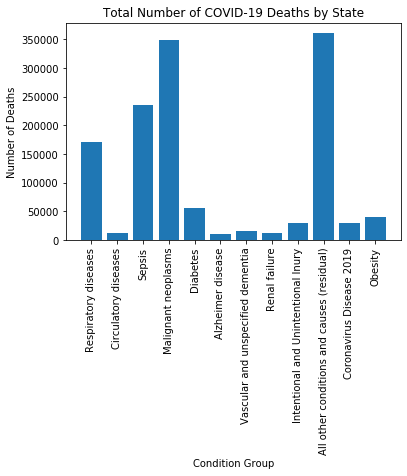

In [98]:
##Fix Formatting

x_axis=covid_complete["Condition Group"].unique()
covid_deaths_state = covid_complete.groupby(["Condition Group"]).sum()["Number of COVID-19 Deaths"]
y_axis= covid_deaths_state

plt.bar(x_axis, y_axis, align= "center")
plt.title("Total Number of COVID-19 Deaths by State")
plt.ylabel("Number of Deaths")
plt.xlabel("Condition Group")
plt.xticks(rotation=90)
plt.show()

In [99]:
fig = px.choropleth(covid_complete,locations="State", locationmode="USA-states", color="Number of COVID-19 Deaths",scope="usa")
fig.show()

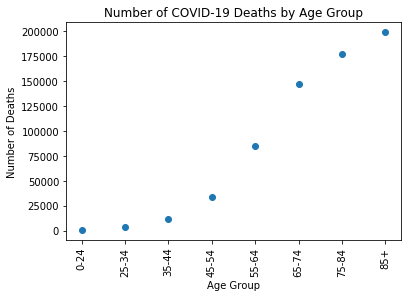

In [100]:

covid_deaths_age_group = covid_complete[covid_complete["Age Group"] != "All ages"]
covid_deaths_age_group_2 = covid_deaths_age_group[covid_deaths_age_group["Age Group"] != "Not stated"]
covid_deaths_age_group_2 = covid_deaths_age_group_2.sort_values(["Age Group"], ascending=True)
x_values = covid_deaths_age_group_2['Age Group'].unique()
covid_deaths_age = covid_deaths_age_group_2.groupby(["Age Group"]).sum()["Number of COVID-19 Deaths"]
y_values = covid_deaths_age
plt.scatter(x_values,y_values)
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.title("Number of COVID-19 Deaths by Age Group")
plt.xticks(rotation=90)
plt.show()


In [108]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.title("Number of COVID-19 Deaths by Age Group")
plt.xticks(rotation=90)
print(f"The r-squared is: {rvalue**2}")
plt.show()


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
covid_condition_group = covid_complete.groupby(["Condition Group", "Condition"])
covid_condition_group.count()
covid_death_condition_group = covid_condition_group["Number of COVID-19 Deaths"].sum()
covid_death_condition_group.head()

In [ ]:
covid_condition = covid_complete.groupby(["State","Condition Group"])
covid_condition.count()
covid_death_condition = covid_condition["Number of COVID-19 Deaths"].sum()
covid_death_condition


In [ ]:
covid_condition_group = covid_condition_group["condition_group"].count()
covid_condition_group